<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [56]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [66]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [67]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  506 non-null    int64   
 1   CRIM        506 non-null    float64 
 2   ZN          506 non-null    float64 
 3   INDUS       506 non-null    float64 
 4   CHAS        506 non-null    float64 
 5   NOX         506 non-null    float64 
 6   RM          506 non-null    float64 
 7   AGE         506 non-null    float64 
 8   DIS         506 non-null    float64 
 9   RAD         506 non-null    float64 
 10  TAX         506 non-null    float64 
 11  PTRATIO     506 non-null    float64 
 12  LSTAT       506 non-null    float64 
 13  MEDV        506 non-null    float64 
 14  AGE_GROUP   506 non-null    category
dtypes: category(1), float64(13), int64(1)
memory usage: 56.1 KB


<Axes: xlabel='MEDV'>

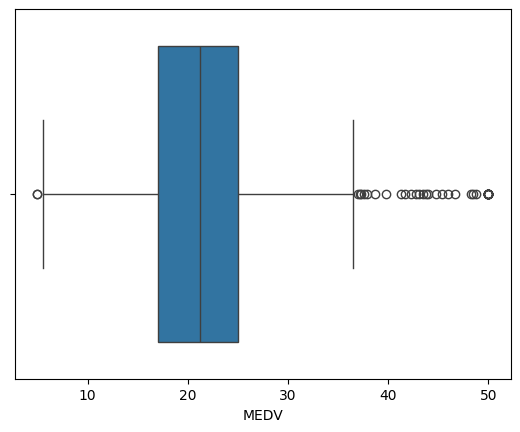

In [3]:
sns.boxplot(data=boston_df, x='MEDV')
# The BoxPlot shows alot of outliers above the upper quartile. With a high range. Most of the data values however are of low.

<Axes: xlabel='CHAS', ylabel='count'>

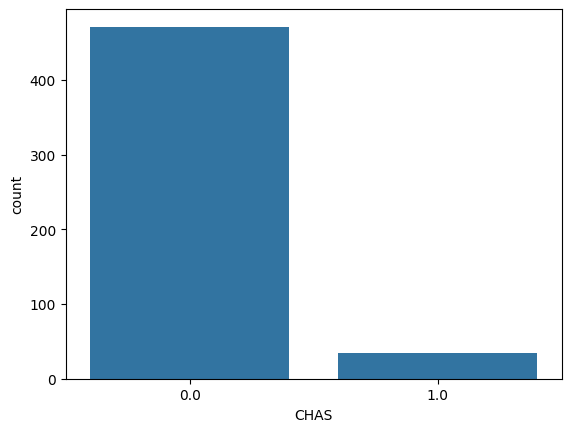

In [10]:
v1 = boston_df['CHAS'].value_counts()
sns.barplot(v1)
# BarChart displays that there are alot more homes that are not beside the river

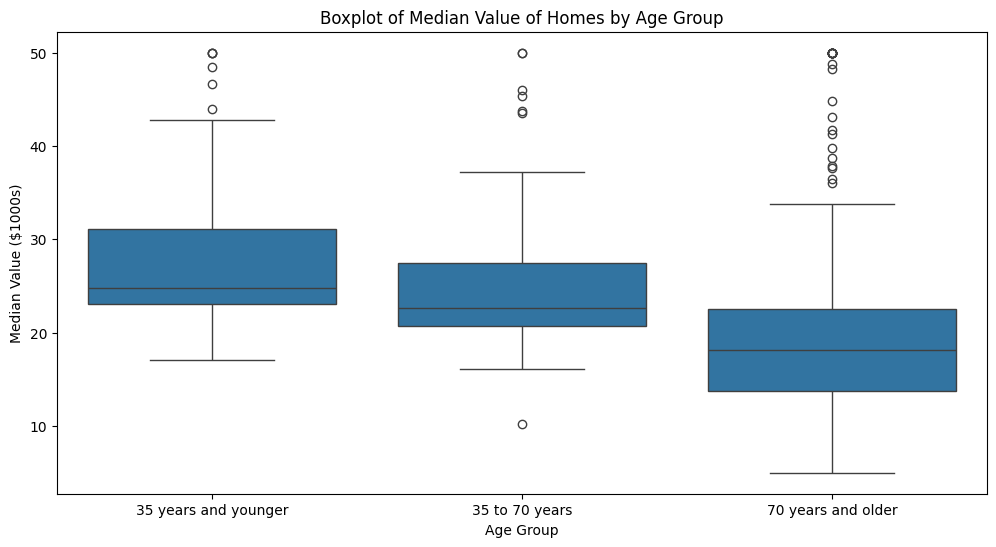

In [57]:
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')], labels=['35 years and younger', '35 to 70 years', '70 years and older'])

plt.figure(figsize=(12, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title('Boxplot of Median Value of Homes by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value ($1000s)')
plt.show()

# Houses which are newer have higher medians while houses which are 75 years or older have a high interquartile range with more outliers

Text(0.5, 1.0, 'Nitric oxide concentrations and the proportion of non-retail business acres per town')

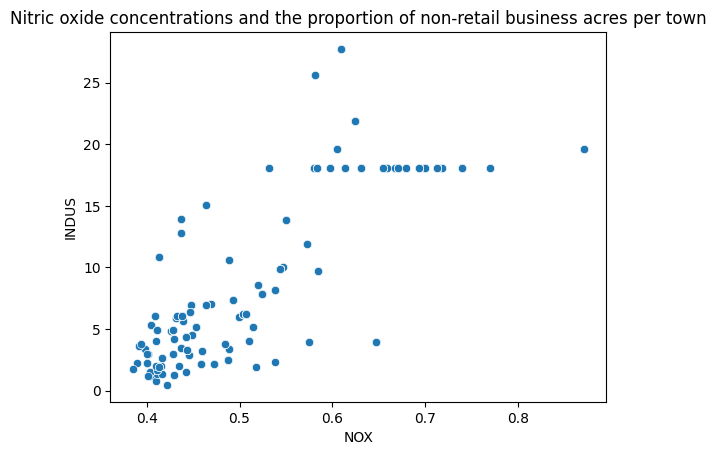

In [37]:
sns.scatterplot(data=boston_df, x='NOX', y='INDUS')
plt.title('Nitric oxide concentrations and the proportion of non-retail business acres per town')
# Clearly shows a positive relationship between Nitric Oxide Concentrains and the proportion of non-retail business acres per town

Text(0.5, 1.0, 'Histogram of Pupil-Teacher Ratio')

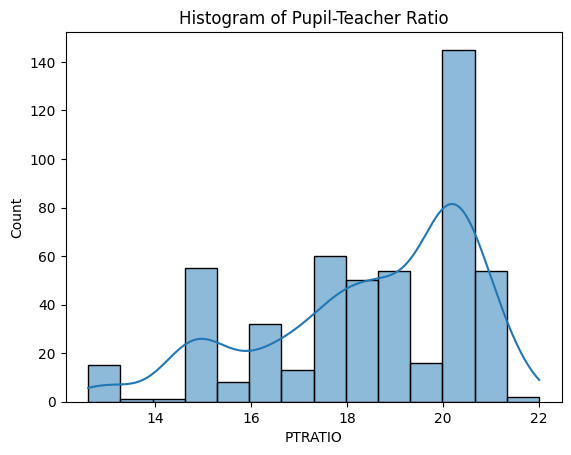

In [59]:
sns.histplot(data=boston_df, x='PTRATIO', kde=True)
plt.title('Histogram of Pupil-Teacher Ratio')
# Left skew in the student teacher ratio data. Showing more students than teachers

In [62]:
from scipy import stats


river_data = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_river_data = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_stat, p_value = stats.ttest_ind(river_data, not_river_data)
# The is a significant difference.
# The p value is less than 0.05
print(t_stat, p_value)

3.996437466090509 7.390623170519905e-05


In [63]:
model = ols('MEDV ~ C(AGE_GROUP)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
# The ANOVA results show a significant difference in median home values across different age groups of buildings.

                    sum_sq     df         F        PR(>F)
C(AGE_GROUP)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN


In [64]:
corr, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f'Correlation coefficient: {corr}, P-value: {p_value}')
# There is a significant correlation. This indicates a significant positive correlation as p value < 0.05

Correlation coefficient: 0.7636514469209157, P-value: 7.91336106123623e-98


In [65]:
model = sm.OLS(boston_df['MEDV'], sm.add_constant(boston_df['DIS'])).fit()
print(model.summary())

# Weighted distance has a significant impact on median home values

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 12 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        00:02:55   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0